In [2]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from numpy.lib.function_base import corrcoef
import math

# Tratamiento Previo

## Lectura del CSV

In [4]:
pokemon_df = pd.read_csv("pokemon_data.csv")

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Quitar Megaevoluciones y calcular puntuación total

In [5]:
blacklist = ['Mega', 'Black', 'Primal', 'White', 'Hoopa', 'Forme', 'Size']

for i in blacklist:
  pokemon_df = pokemon_df.drop(pokemon_df[pokemon_df['Name'].str.contains(i)].index) # Quitamos pokemon con "Mega" en su nombre

pokemon_df['Total'] = pokemon_df.iloc[:,4:9].sum(axis=1) # Sumamos la puntuació de todos los atributos para calcular el tottal

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,412
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True,581
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True,581
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,550


## Separar legendarios y no legendarios


Se generan dos dataframes independientes que distinguen entre Pokemon legendarios y no legedarios

In [6]:
grouped = pokemon_df.groupby(pokemon_df.Legendary)

legendary_df  = grouped.get_group(True) # Legendary DataFrame
non_legendary_df  = grouped.get_group(False) # Non Legendary Dataframe

# Análisis estadistico de Legendarios

# Porcentaje de pokemon legendarios de cada tipo

In [7]:
tab = pd.crosstab(index=legendary_df['Type 1'], columns='count') # Contamos cuantos legendarios hay de cada tipo

porcentajes = (tab/tab.sum())*100 # Calculamos el porcentaje diviiendo por el total multiplicando por 100

Como se puede ver en el dataframe de porcentajes, se almacena el porcentaje de pokemon legendarios que hay segun su tipo. A continuación se muestra en un pychar:

# Ploteamos en grafico de sectores

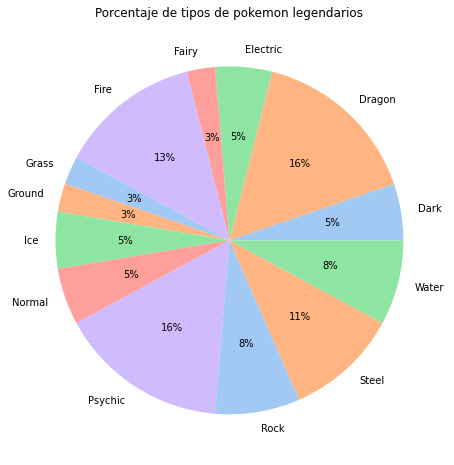

In [8]:
#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

En este diagrama de sectores, de una manea más visual se puede apreciar los pokemon de tipo dragon y tipo psiquico son los que más predominan. 

A continuación realizamos una descriptiva más exhaustiva del dataframe de pokemon legendarios para hacernos una idea de la distribución de las distintas variables cuantitativas.

In [9]:
legendary_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,442.815789,94.447368,106.868421,105.578947,112.447368,110.157895,93.921053,3.578947,529.500000
std,175.465844,16.388357,24.643590,25.549773,25.920562,26.915811,19.809064,1.481992,46.158803
min,144.000000,50.000000,50.000000,70.000000,50.000000,70.000000,50.000000,1.000000,465.000000
25%,377.250000,80.000000,90.000000,90.000000,91.250000,90.000000,90.000000,3.000000,490.000000
50%,480.500000,91.000000,100.000000,100.000000,112.500000,100.000000,97.000000,4.000000,530.000000
75%,602.000000,103.750000,123.750000,120.000000,130.000000,123.750000,108.000000,5.000000,580.000000
max,721.000000,126.000000,160.000000,200.000000,154.000000,200.000000,130.000000,6.000000,600.000000


También podemos mostrar la descriptiva anterior en un diagrama de cajas y bigotes, para poder comprender mejor la distribución de nuestros datos de manera gráfica

## Box-Whiskers

### Box - Whiskers puntuación total

Con este diagrama podemos ver la distribución de nuetsros datos de puntuación total. a priori a juzgar por la posición de la mediana dentro de la caja podmeos decir que la puntuación total no sigue una distribución normal, ya que la media y la mediana no son parecidas (la linea de la medianano esta en medio de la caja)

Text(0, 0.5, 'Score')

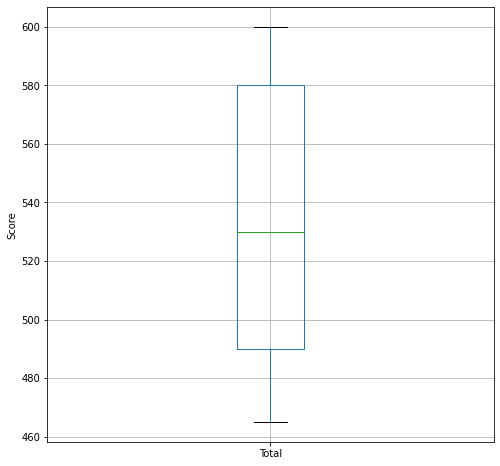

In [10]:
plt.figure(figsize=(8,8))

legendary_df.boxplot('Total') # Digrama de cajas y bigotes de la puntuación total

plt.ylabel("Score")

### Box - Whiskers de cada atributo 

Ahora observamos con más detenimiento la distribución de los datos dentro de cada atributo. A priori, podrimaos decir que lso datos de ataque parecen seguir una distribución normal.

Text(0, 0.5, 'Score')

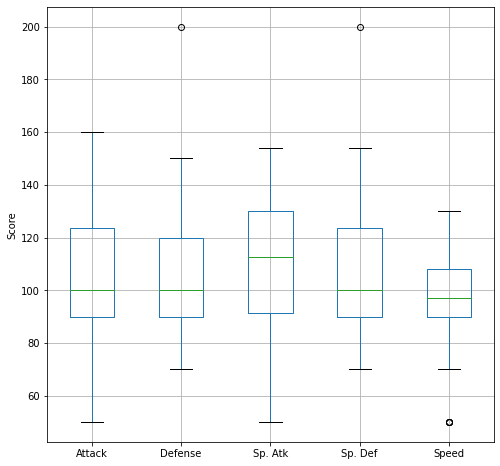

In [11]:
plt.figure(figsize=(8,8))
legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])
plt.ylabel("Score")

## Análisis de correlación entre ataques y defensas




En este punto, vamos a ver la correlación que existe entre los distintos ataques y defensas que tienen los pokemon. Estudiaremos la correlación que existe entre el ataque y el ataque especial y por otro lado la que existe entre la defdensa y la defensa especial

### Correlación Ataque - Ataque Especial

array([[1.        , 0.26872507],
       [0.26872507, 1.        ]])

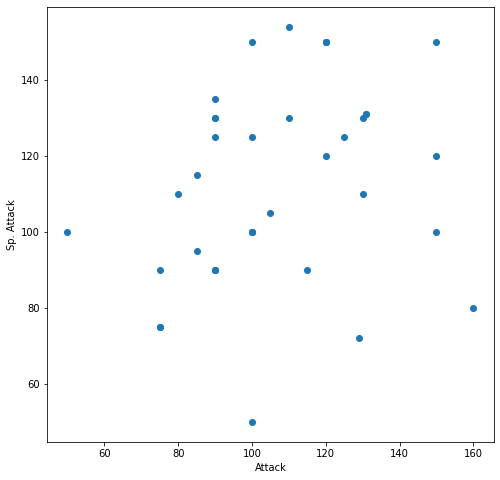

In [12]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Attack"],legendary_df["Sp. Atk"])
plt.xlabel("Attack")
plt.ylabel("Sp. Attack")

corrcoef(legendary_df["Attack"],legendary_df["Sp. Atk"]) # Calculo de la matriz de correlación

Si representamos los datos de ataque y ataque especial en un diagrama de dispersión y calculamos su coeficiente de correlación se aprecia que hay cierta correlación positiva entre ataque y ataque especial aunque no muy fuerte ya que el coeficiente nos da un valor de 0.43. Esto también se puede ver tambien en diagrama si nos fijamos en que los puntos no están muy agrupados.

### Correlación Defensa - Defensa Especial

array([[1.        , 0.18013723],
       [0.18013723, 1.        ]])

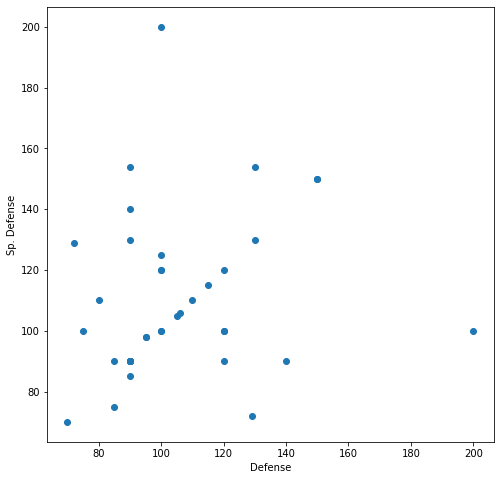

In [13]:
plt.figure(figsize=(8,8))

# Diagrama de dispersión
plt.scatter(legendary_df["Defense"],legendary_df["Sp. Def"])
plt.xlabel("Defense")
plt.ylabel("Sp. Defense")

corrcoef(legendary_df["Defense"],legendary_df["Sp. Def"]) # Calculo de la matriz de correlación

In [14]:
print(legendary_df[legendary_df["Sp. Def"] == 200])
print(legendary_df[legendary_df["Defense"] == 200])

       #    Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
415  378  Regice    Ice    NaN  80      50      100      100      200     50   

     Generation  Legendary  Total  
415           3       True    530  
       #      Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
414  377  Regirock   Rock    NaN  80     100      200       50      100   

     Speed  Generation  Legendary  Total  
414     50           3       True    530  


Por otro lado, al representar la defensa y la defensa especial en un diagrama de dispersión vemos como los datos parecen estar más agrupados y de la misma forma (correlación positiva) que en el caso anterior cuando comparabamos los ataques. 

Sin embargo, hay dos Pokemon que se salen de esta agrupación tal y como podemos ver en el gráfico. Estos son Regice y Regirock de la tercera generación.

Por estos dos Pokemon es por lo que el coeficiente de correlación nos da de 0.38. Si no considerasemos estso dos pokemon el valor de la correlación aumentaría

### Conclusión

Podemos sacar como conclusión de este análisis que tanto ataques como defensas guardan una correlación lineal positiva. En el caso de los ataques con más fuerza ya que en las defensas tenemos a dos Pokemon que tienen defensa y defensa especial muy desbalanceadas entre si 

# Top 5

In [15]:
top_legendaries = legendary_df.sort_values('Total', ascending=False).head(5)

top_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,600
540,483,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True,590
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,590
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True,590
706,643,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True,590


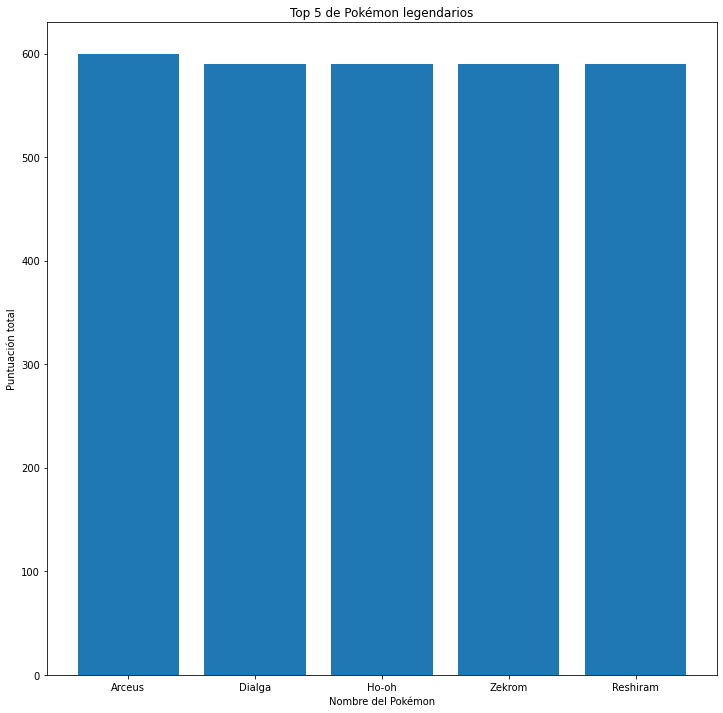

In [16]:
plt.figure(figsize=(12,12))

plt.bar(top_legendaries['Name'], top_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon legendarios')
plt.show()

# No legendarios

# Sacar porcentaje de tipo

In [17]:
tab = pd.crosstab(index=non_legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Bug,9.587021
Dark,3.834808
Dragon,2.507375
Electric,5.604720
Fairy,2.359882
Fighting,3.687316
Fire,6.342183
Flying,0.294985
Ghost,2.949853


<Figure size 576x576 with 0 Axes>

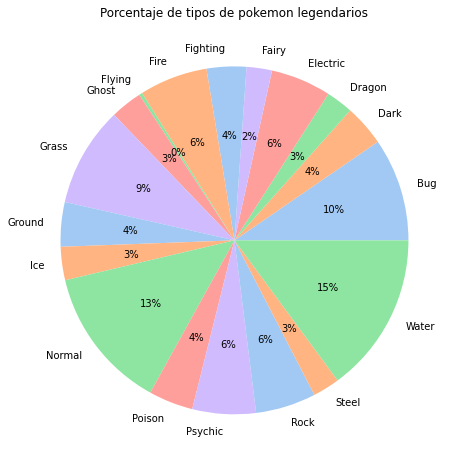

In [18]:
plt.figure(figsize=(8,8))

#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

# 

# Box and Whiskers de Ataques y Defensa

<AxesSubplot:>

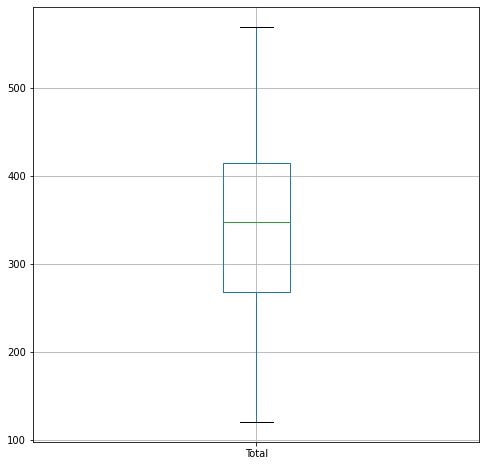

In [19]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot('Total')

<AxesSubplot:>

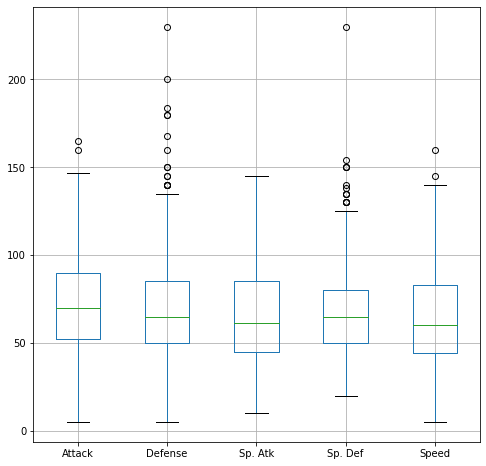

In [20]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Scatter plot

array([[1.        , 0.22536116],
       [0.22536116, 1.        ]])

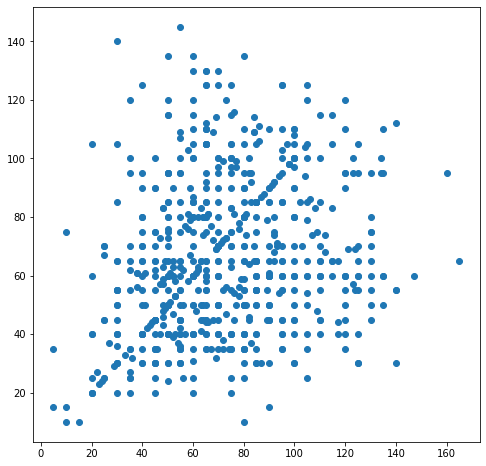

In [21]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])
corrcoef(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])

array([[1.        , 0.44408917],
       [0.44408917, 1.        ]])

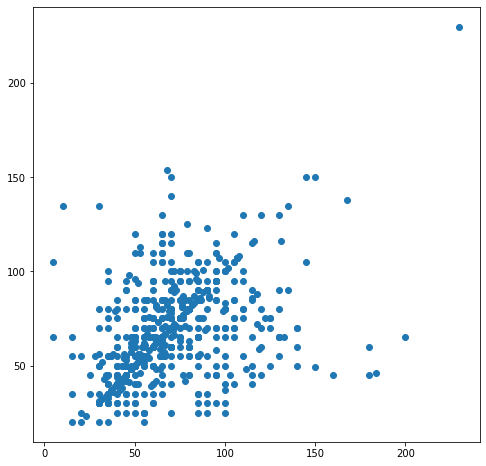

In [22]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])
corrcoef(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])

# Top 5

In [23]:
top_non_legendaries = non_legendary_df.sort_values('Total', ascending=False).head(5)

top_non_legendaries

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,570
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,539
412,376,Metagross,Steel,Psychic,80,135,130,95,90,70,3,False,530
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,520
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,520


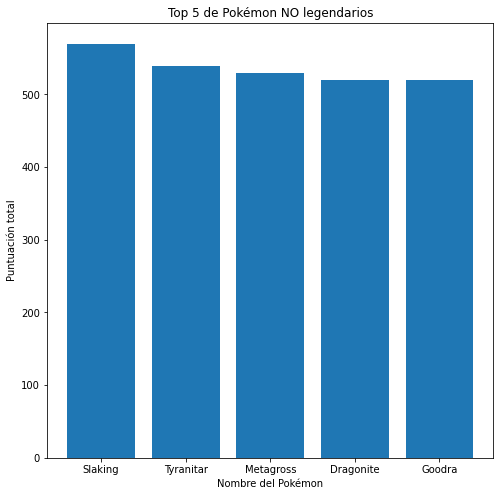

In [24]:
plt.figure(figsize=(8,8))

plt.bar(top_non_legendaries['Name'], top_non_legendaries['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon NO legendarios')
plt.show()

# Puntuación total de legendarios y no legendarios según el tipo

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

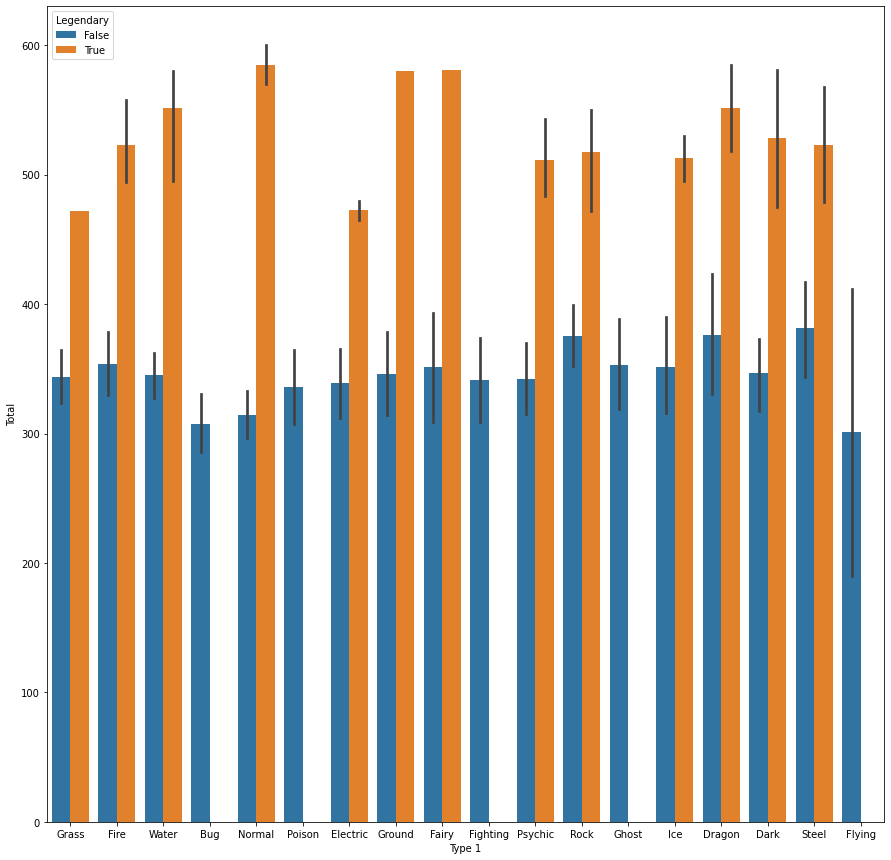

In [25]:
plt.figure(figsize=(15,15))

sns.barplot(data=pokemon_df, x="Type 1", y="Total", hue="Legendary")

# Analisis de normalidad de los datos de Pokemon

Formas de ver normalidad:
 - Histograma (con desity)
 - Box plot
 - Describe
 - QQ Plot
 - Asimetria/Kurtosis
 - Contraste de hipotesis

# Histograma

Mostramos la población completa de pokemon según su puntuación total

<AxesSubplot:>

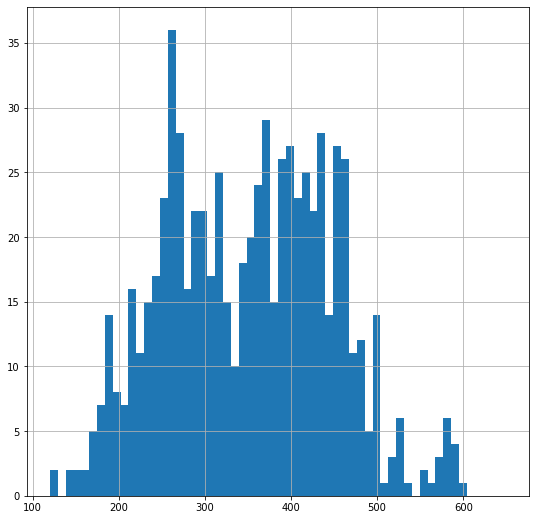

In [27]:
pokemon_df['Total'].hist(bins=58,
                range=(120,650),
                figsize=(9,9))

Vemos que existe un grupo situado en una puntuación m entre 550 y 600 puntos que son los Pokemon Legendarios

<AxesSubplot:>

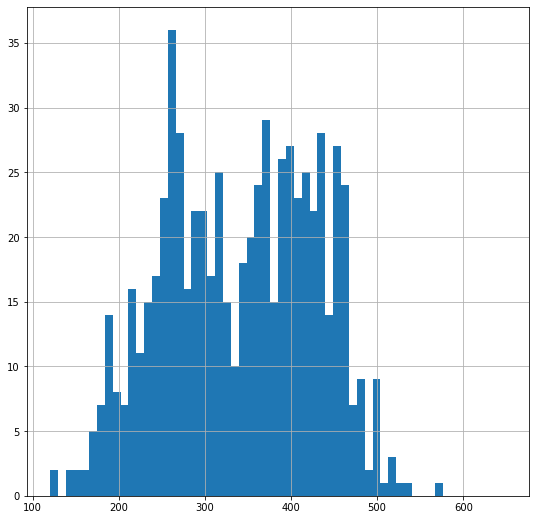

In [26]:
non_legendary_df['Total'].hist(bins=58,
                range=(120,650),
                figsize=(9,9))

<AxesSubplot:>

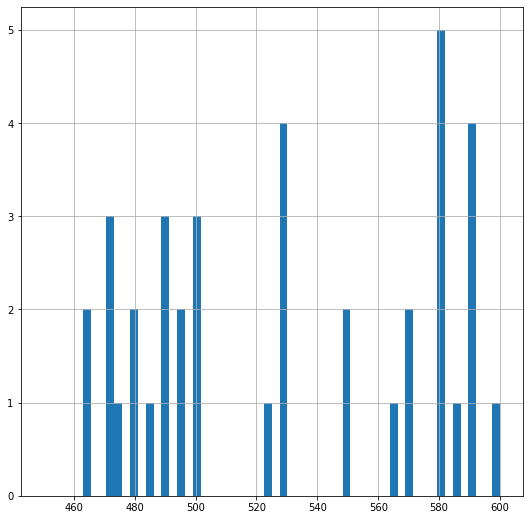

In [31]:
legendary_df['Total'].hist(bins=58,
                range=(450,600),
                figsize=(9,9))

# Distribución de probabilidad

<AxesSubplot:ylabel='Density'>

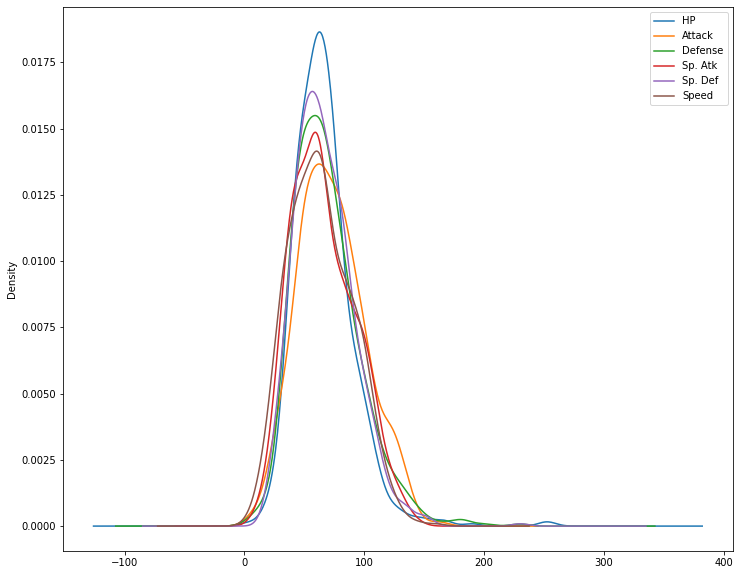

In [34]:
atributes = ["HP", "Attack","Defense","Sp. Atk","Sp. Def","Speed"] # Almacenamos los atributos en una lista

non_legendary_df[atributes].plot(kind = "density", figsize = (12,10)) # Distribución de probabilidad

<AxesSubplot:ylabel='Density'>

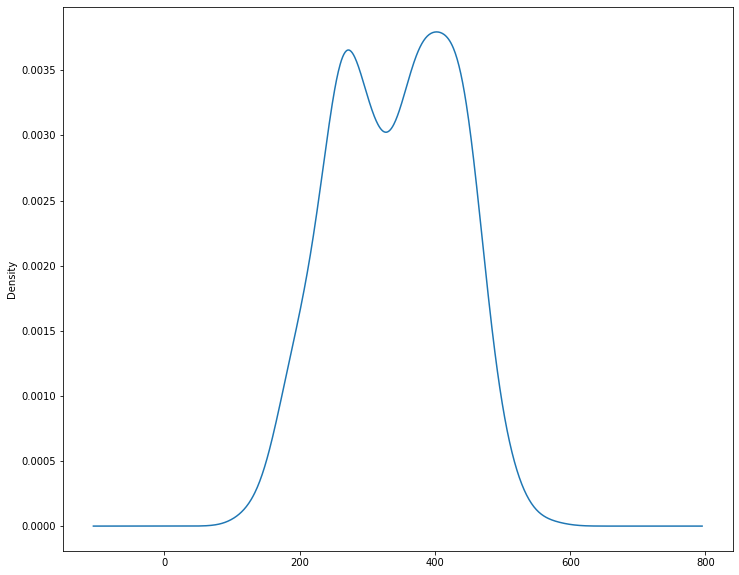

In [35]:
non_legendary_df['Total'].plot(kind = "density", figsize = (12,10)) # Distribución de probabilidad

# Box plot

<AxesSubplot:>

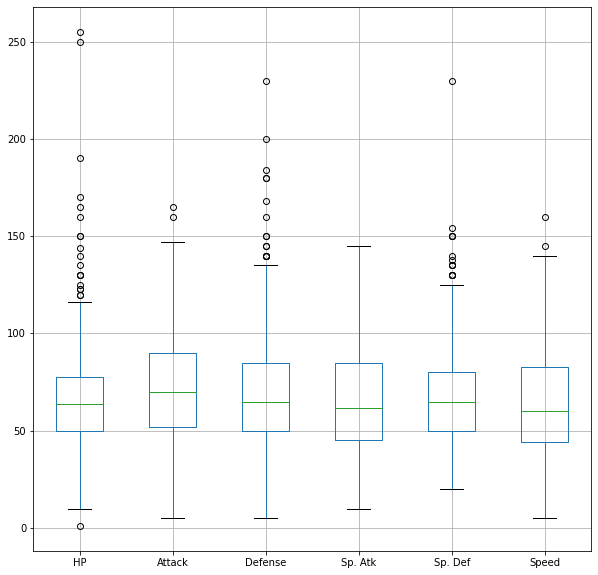

In [36]:
plt.figure(figsize=(10,10))
non_legendary_df.boxplot(column=atributes)

# Describe

In [37]:
non_legendary_df[atributes].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,66.492625,72.570796,68.859882,65.936578,66.904130,63.674041
std,25.308305,27.881796,28.229480,26.404765,24.974929,26.496926
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,52.000000,50.000000,45.000000,50.000000,44.250000
50%,64.000000,70.000000,65.000000,61.500000,65.000000,60.000000
75%,77.750000,90.000000,85.000000,85.000000,80.000000,83.000000
max,255.000000,165.000000,230.000000,145.000000,230.000000,160.000000


# QQ plot

HP


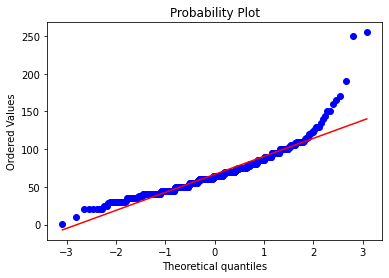

Attack


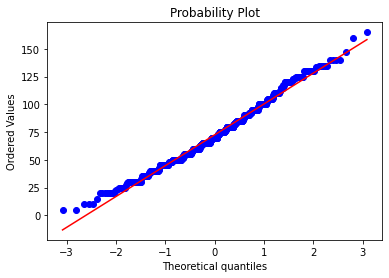

Defense


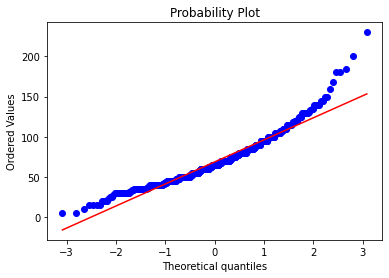

Sp. Atk


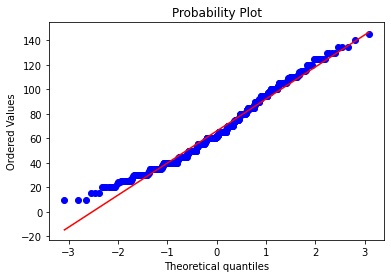

Sp. Def


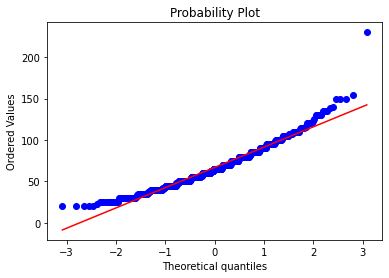

Speed


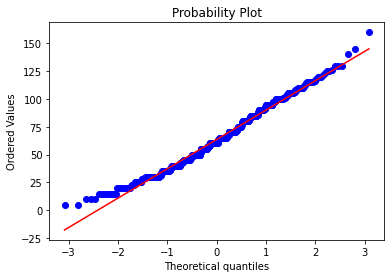

In [38]:
for atribute in atributes:
  scipy.stats.probplot(non_legendary_df[atribute], dist="norm", plot=plt)
  print(atribute)
  plt.show()

# Asimetria / Kurtosis

In [39]:
for atribute in atributes:
  print(atribute)
  print(pd.Series(pokemon_df[atribute]).skew())
  print(pd.Series(pokemon_df[atribute]).kurtosis())



HP
1.705611434963191
8.089825957693373
Attack
0.3277063927076206
-0.22500965257698358
Defense
1.1052376441802925
2.4671364832414713
Sp. Atk
0.49869511462327376
-0.2789527695537064
Sp. Def
1.0094384363083313
2.3989776827715397
Speed
0.2683283296337585
-0.4836936263057656


# Estudio estadistico del ataque de los Pokemon más comunes de No Legendarios 

Estudiaremos los pokemon de tipo Normal y Agua que son los que más hay de acuerdo con el pychart del porcentaje de pokemon según el tipo.

Accedemos a los pokemon no legendarios de tipo Normal

In [40]:
normal_df = non_legendary_df[non_legendary_df['Type 1'] == 'Normal']

normal_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1,False,195
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False,278
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False,378
24,19,Rattata,Normal,NaN,30,56,35,25,35,72,1,False,181
25,20,Raticate,Normal,NaN,55,81,60,50,70,97,1,False,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,628,Braviary,Normal,Flying,100,123,75,57,75,80,5,False,430
727,659,Bunnelby,Normal,NaN,38,36,38,32,36,57,6,False,180
728,660,Diggersby,Normal,Ground,85,56,77,50,77,78,6,False,345
729,661,Fletchling,Normal,Flying,45,50,43,40,38,62,6,False,216


Accedemos a los pokemon no legendarios de tipo Agua

In [41]:
water_df = non_legendary_df[non_legendary_df['Type 1'] == 'Water']

water_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,271
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,347
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,452
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False,265
60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,656,Froakie,Water,NaN,41,56,40,62,44,71,6,False,243
725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,308
726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False,408
762,692,Clauncher,Water,NaN,50,53,62,58,63,44,6,False,286


Ahora vamos a calcular el intervalo de confianza para la media del ataque de los pokemon de tipo Normal y de tipo agua que no sean legendarios

Primero calculamos las medias de cada grupo

In [42]:
# Media de ataque de tipo normal 
normal_atck = normal_df['Attack'].mean()
water_atck = water_df['Attack'].mean()

print(normal_atck)
print(water_atck)

70.15555555555555
70.22772277227723


Ahora vamos a ver las funciones de densidad de probablidad para el ataque de los dos tipos de Pokemon que hemos escogido

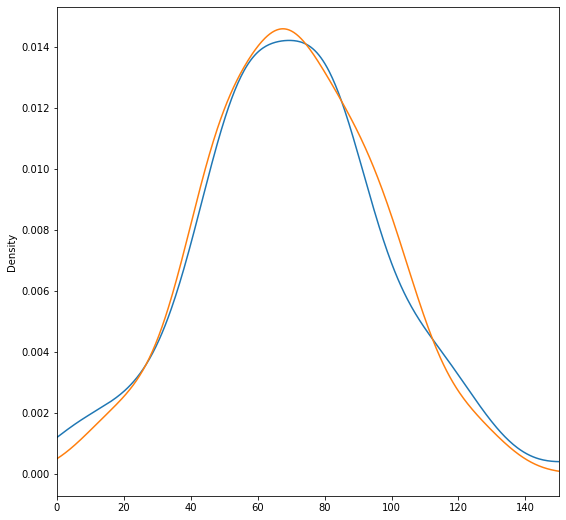

In [43]:
normal_df['Attack'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));  

water_df['Attack'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));                         

A juzgar por la forma de la función de densidad vemos que las dos variables parecen seguir una distribución normal con media entorno a 70, como hemos calculado antes

In [44]:
normal_std = normal_df['Attack'].std(ddof=1)
water_std = water_df['Attack'].std(ddof=1)

print(normal_std)
print(water_std)

sigma_normal = normal_std/math.sqrt(normal_df.shape[0])
sigma_water = water_std/math.sqrt(water_df.shape[0])

print(sigma_normal)
print(sigma_water)

27.765839132315055
24.867199757157547
2.9267764267982956
2.474378857475257


Calculamos el intervalo de confianza para la media de los pokemon de tipo normal

In [45]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= normal_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = normal_atck,                # Sample mean
                 scale = sigma_normal)             # Standard deviation estimate

<ipython-input-45-cb2bfeddc0c8>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(64.34011313767807, 75.97099797343303)

Calculamos el intervalo de confianza para los Pokemon de tipo Agua

In [46]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= water_df.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = water_atck,                # Sample mean
                 scale = sigma_water)             # Standard deviation estimate

<ipython-input-46-6df656da7865>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(65.31862559319238, 75.13681995136209)

Viendo el intervalo de confianza obtenido y las medias calculadas podemos asegurar con una certeza del 95 % que el valor de la media de los pokemon de toda la población de no legendarios se encontrará dentro de este rango.

In [47]:
non_legendary_df['Attack'].mean()

72.570796460177

# T-test

## Contraste de hipotesis univariante para pokemon de tipo normal

In [49]:
scipy.stats.ttest_1samp(a = normal_df['Attack'],               # # Sample normal type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-0.8252222077870017, pvalue=0.4114518917594412, df=89)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo normal se parece a la media del ataque de los pokemon no legendarios

## Contraste de hipotesis univariante para pokemon de tipo agua

In [ ]:
scipy.stats.ttest_1samp(a = water_df['Attack'],               # Sample water type data
                 popmean = non_legendary_df['Attack'].mean())  # Pop mean

TtestResult(statistic=-1.0510196688722035, pvalue=0.29573325335376965, df=102)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo agua se parece a la media del ataque de los pokemon no legendarios, pero menos que la media del ataque de tipo normal

## Contraste de hipotesis Bivariante para comparar medias de no legendarios de tipo normal y agua

In [ ]:
scipy.stats.ttest_ind(a= normal_df['Attack'],
                b= water_df['Attack'],
                equal_var=False)    # Assume samples have equal variance?

# No tenenmos evidencia estadistica suficiente para decir que el grupo de Wisconssin es diferente del grupo de Minnesota al 95%

Ttest_indResult(statistic=0.1567616433604365, pvalue=0.8756063511036253)

Viendo el pvalor final obtenido, podemos decir que tenemos evidencia estadistica suficiente para afirmar que la media del ataque de los pokemon de tipo normal se parece a la media del ataque de los pokemon de tipo agua.

# Test ANOVA

- Comprobación de poblaciones normalmente distribuidas en cada grupo
- Homecedasticidad de varianzas entre grupos
- Mustras aleatorias e independientes

Comprobamos que la densidad de probabilidad por grupo para ver si siguen  una distribución normal

Text(0, 0.5, 'Densidad de probabilidad')

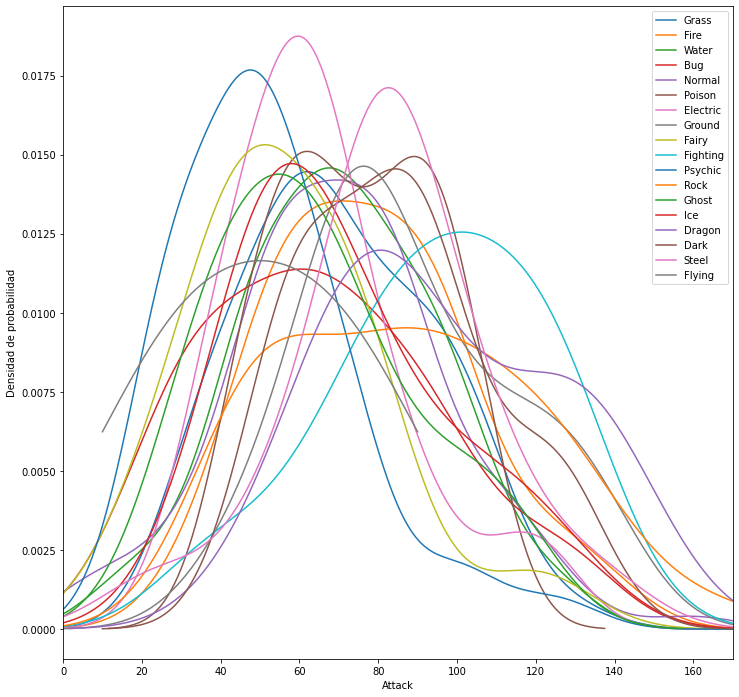

In [70]:
# Extraemos los distintos tipos de Pokemon en una lista

types = non_legendary_df['Type'].unique()

# Formateamos el nombre de la columna de tipo Ppra poder utilizar con  Statmodels

non_legendary_df = non_legendary_df.rename(columns={'Type 1': 'Type'})

# Mostramos la distribución de provbbilidad del ataque según el tipo

groups = non_legendary_df.groupby("Type").groups

for tipo in types:
  tipo = non_legendary_df['Attack'][groups[tipo]]  

  tipo.plot(kind="density",  # Plot sample mean density
                                   figsize=(12,12),
                                   xlim=(0,170));  
  
# agregar leyenda y etiquetas de eje
plt.legend(labels=types, loc='upper right')
plt.xlabel('Attack')
plt.ylabel('Densidad de probabilidad')    

A simple vista se puede comprobar como la la cantidad de puntos de ataque no sigue una distribución normal para todos los tipos de Pokemon.

Veremos esto mejor en forma de diagrama de bigotes a continuación

Homocedasticidad de varianzas entre grupos

<AxesSubplot:xlabel='Type', ylabel='Attack'>

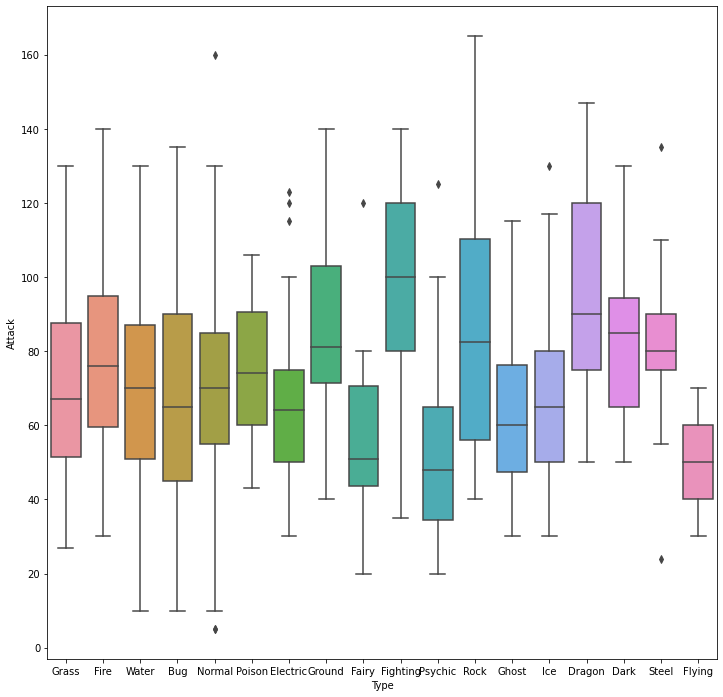

In [71]:
# Mostramos la distribución de provbbilidad del ataque según el tipo

plt.figure(figsize=(12,12))
sns.boxplot(x="Type", y="Attack", data=non_legendary_df)

Con este diagrama comprobamos visualmente que no hay homocedasticidad de varianzas en todos los grupos. Por ejemplo, la varianza de ataque del tipo dragon es mucho mása grande que la del tipo fuego.

Vamos a corroborar esto con el Test ANOVA

ANOVA Test

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Alternate method
model = ols('HP ~ Type',                 # Model formula
            data = non_legendary_df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


                 sum_sq     df         F    PR(>F)
Type       24363.089913   17.0  2.311136  0.002034
Residual  409262.373213  660.0       NaN       NaN


Dado el valor de p, que es menor a 0.05, no tenemos evidencia estadistica para afirmar las medias muestrales del ataque de cada tipo de pokemon, son las mismas

Text(0, 0.5, 'Densidad de probabilidad')

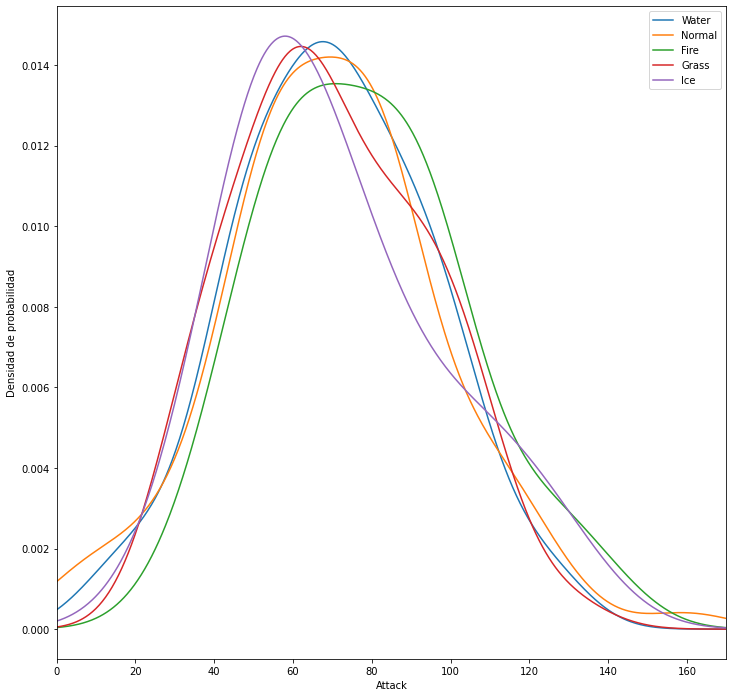

In [74]:
types = ["Water", "Normal", "Fire", "Grass", "Ice"]

for tipo in types:
  tipo = non_legendary_df['Attack'][groups[tipo]]  

  tipo.plot(kind="density",  # Plot sample mean density
                                   figsize=(12,12),
                                   xlim=(0,170));  
  
# agregar leyenda y etiquetas de eje
plt.legend(labels=types, loc='upper right')
plt.xlabel('Attack')
plt.ylabel('Densidad de probabilidad')   

In [76]:
# Mostramos la distribución de provbbilidad del ataque según el tipo

plt.figure(figsize=(12,12))
sns.boxplot(x="Type", y="Attack", data=non_legendary_df)


KeyError: ignored